Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     6 non-null      int64         
 1   customer_id  6 non-null      int64         
 2   region       6 non-null      object        
 3   amount       6 non-null      int32         
 4   order_date   6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 344.0+ bytes
None 

   order_id  customer_id  region  amount order_date
0      1011           11    Pune   25000 2025-03-11
1      1021           21  Mumbai   15000 2025-05-03
2      1033           33  Nagpur   28000 2025-04-01
3      1054           54  Nashik   52000 2025-08-12
4      1066           11    Pune   12000 2025-09-10 

Total sales    : ₹162000
Average order  : ₹27000.00

Top regions by sales:
region
Nashik    52000
Mumbai    45000
Pune      37000
Nagpur 

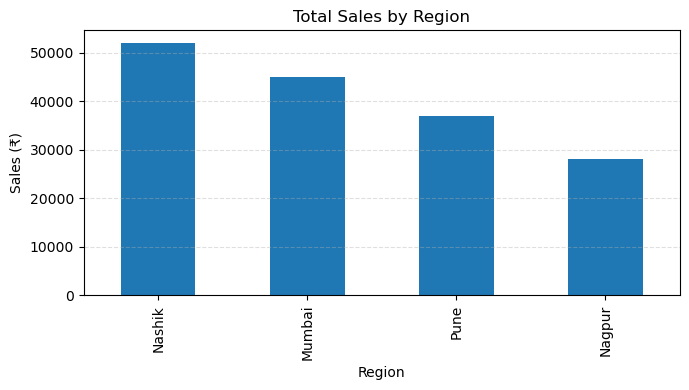


Top 3 customers (id : total sales):
customer_id
54    52000
21    45000
11    37000
Name: amount, dtype: int32


In [1]:
"""
Day 3 — Sales Analysis:
- Load a small in-memory sales dataset
- Clean types, compute totals & averages
- Top 3 customers by sales
- Plot sales by region
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# create simple dataframe (you can export to CSV if needed)
data = {
    "order_id": [1011, 1021, 1033, 1054, 1066, 1077],
    "customer_id": [11, 21, 33, 54, 11, 21],
    "region": ["Pune", "Mumbai", "Nagpur", "Nashik", "Pune", "Mumbai"],
    "amount": [25000, 15000, 28000, 52000, 12000, 30000],
    "order_date": pd.to_datetime(["2025-03-11", "2025-05-03", "2025-04-01", "2025-08-12", "2025-09-10", "2025-09-15"])
}

df = pd.DataFrame(data)

def clean_and_describe(df):
    # ensure types
    df['amount'] = pd.to_numeric(df['amount'], errors='coerce').fillna(0).astype(int)
    df['region'] = df['region'].astype(str).str.strip()
    # basic checks
    print("Data overview:")
    print(df.info(), "\n")
    print(df.head(), "\n")
    return df

def totals_and_top_customers(df):
    total_sales = df['amount'].sum()
    avg_sales = df['amount'].mean()
    sales_by_region = df.groupby('region')['amount'].sum().sort_values(ascending=False)
    sales_by_customer = df.groupby('customer_id')['amount'].sum().sort_values(ascending=False)

    print(f"Total sales    : ₹{total_sales}")
    print(f"Average order  : ₹{avg_sales:.2f}")
    print("\nTop regions by sales:")
    print(sales_by_region)
    print("\nTop customers by sales:")
    print(sales_by_customer.head(5))

    return {
        "total_sales": total_sales,
        "avg_sales": avg_sales,
        "sales_by_region": sales_by_region,
        "sales_by_customer": sales_by_customer
    }

def plot_region_sales(sales_by_region):
    plt.figure(figsize=(7,4))
    sales_by_region.plot(kind='bar')
    plt.title("Total Sales by Region")
    plt.ylabel("Sales (₹)")
    plt.xlabel("Region")
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

def top_3_customers(sales_by_customer):
    top3 = sales_by_customer.head(3)
    print("\nTop 3 customers (id : total sales):")
    print(top3)
    return top3

if __name__ == "__main__":
    df = clean_and_describe(df)
    results = totals_and_top_customers(df)
    plot_region_sales(results['sales_by_region'])
    top3 = top_3_customers(results['sales_by_customer'])
